<a href="https://colab.research.google.com/github/samuel077ml/clase-git-jueves/blob/main/Taller_1_Inteligencia_Artificial_Implementaci%C3%B3n_del_Modelo_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Importación del modelo


In [ ]:
import pandas as pd
import numpy as np

## 1. Descargar el Dataset en formato MNIST
En este caso, se usa una función de sklearn, para importar un modelo de la base de datos abierta OpenML

In [ ]:
# SignMNIST

# Se importa la base de datos automaticamente
from sklearn.datasets import fetch_openml
# Se almacena en mst
mst = fetch_openml(name='SignMNIST', as_frame=False)


In [ ]:
# Mostramos los datos que hay dentro del dataset
mst.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

## 2. Organización de los datos
En esta estructura de la información, los datos en $X$, se encuentran en el valor `data`, y los de $y$ en `target`

In [ ]:
# Se extraen las Xs y las Ys del dataset
X, y = mst['data'], mst['target']

Mostrando imágenes del dataset

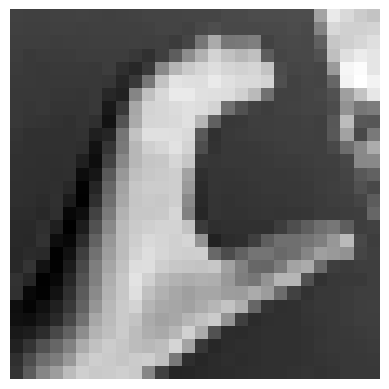

In [ ]:
import matplotlib.pyplot as plt

# Esta función nos va a permitir mostrar una imagen
# plot_digit(imagen::array)
def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")


plot_digit(X[2])
plt.show() # Opcional en un notebook de colab

In [ ]:
len(X) # Cantidad de datos

34627

## 3. Split de la base de datos para _training_ y _testing_
De aquí hay que sacar una cantidad de datos de prueba y de entrenamiento    
En este caso se usará un 80% de datos de entrenamiento y un 20% de datos de prueba de esta forma:    
`X_train`, `y_train` : Datos de entrenamiento    
`X_test`, `y_test` : Datos de prueba

In [ ]:
X_train, X_test, y_train, y_test = X[:27701], X[27701:], y[:27701], y[27701:]
print("Cantidad de datos")
print("Prueba del modelo:",len(X_test),"Entrenamiento del modelo:",len(X_train))

Cantidad de datos
Prueba del modelo: 6926 Entrenamiento del modelo: 27701


In [ ]:
# print(y_train[i])
# plot_digit(X_train[i])

Nota: Según la documentación de la base de datos, los números (0-25) corresponden a los dígitos (A-Z)

## 4. Selección de un modelo de clasificación binaria.


In [ ]:
# Se utiliza un modelo de clasificación binario
# Ver cual usamos o este por omisión

from sklearn.svm import SVC
model = SVC(kernel='linear')
funcion_entrenada = model.fit(X_train, y_train)

Prueba con un dato

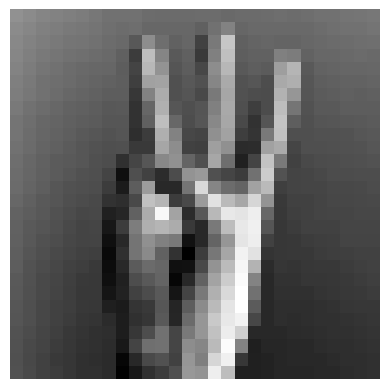

In [ ]:
plot_digit(X_test[3]) # Vamos a probar con este

In [ ]:

digito = X_test[3]
# Se predice un dígito del modelo con la funcion creada
test = funcion_entrenada.predict(digito.reshape(1, -1))
if test == 22:
  print("Es una W")
else:
  print("No es una W")
print(test)

Es una W
[22]


Prueba de todos los valores de `y_test`

In [ ]:
y_test_pred = funcion_entrenada.predict(X_train)

In [ ]:
# Crear la matriz de confusión
from sklearn.metrics import confusion_matrix

m_conf = confusion_matrix(y_train, test)

ValueError: Found input variables with inconsistent numbers of samples: [27701, 1]